In [3]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [4]:
bitcoin = yf.Ticker("BTC-INR")

In [5]:
bitcoin.info

{'companyOfficers': [],
 'name': 'Bitcoin',
 'startDate': 1367107200,
 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,751,800. The last known price of Bitcoin is 32,956.8434224 USD and is up 0.85 over the last 24 hours. It is currently trading on 9030 active market(s) with $25,228,880,204.99 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 1,
 'exchange': 'CCC',
 'shortName': 'Bitcoin INR',
 'exchangeTimezoneName': 'Europe/London',
 'exchangeTimezoneShortName': 'BST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '3600000',
 'quoteType': 'CRYPTOCURRENCY',
 'symbol': 'BTC-INR',
 'messageBoardId': 'finmb_BTC_CCC',
 'market': 'ccc_market',
 'previousClose': 3543284.2,
 'regularMarketOpen': 3543284.2,
 'twoHundredDayAverage': 3330516.2,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': 2436605935616,
 'regular

In [6]:
bitcoin.history(period='5d')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-10,3446370.50,3472965.50,3328250.25,3393156.0,2497023122293,0,0
2021-08-11,3394248.25,3470411.00,3374879.25,3378509.0,2543105851852,0,0
2021-08-12,3377267.25,3432150.50,3259088.00,3299260.5,2504328020728,0,0
2021-08-13,3300107.25,3549945.75,3288436.75,3547077.0,2355963710189,0,0
2021-08-14,3543284.25,3569740.00,3433127.25,3446952.0,2436605935616,0,0


In [8]:
df=bitcoin.history(start='2001-01-19', end='2022-05-13', actions=False)

In [9]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-18,7.349759e+05,7.314907e+05,7.254785e+05,7.259610e+05,1151007367909
2019-09-19,7.261210e+05,7.350398e+05,7.033428e+05,7.329512e+05,1423413584969
2019-09-20,7.329443e+05,7.324158e+05,7.214724e+05,7.249939e+05,1049162707455
2019-09-21,7.251369e+05,7.254537e+05,7.121104e+05,7.134639e+05,955959548212
2019-09-22,7.137771e+05,7.173071e+05,7.064909e+05,7.170186e+05,939823886302
...,...,...,...,...,...
2021-08-10,3.446370e+06,3.472966e+06,3.328250e+06,3.393156e+06,2497023122293
2021-08-11,3.394248e+06,3.470411e+06,3.374879e+06,3.378509e+06,2543105851852
2021-08-12,3.377267e+06,3.432150e+06,3.259088e+06,3.299260e+06,2504328020728


In [10]:
df.index

DatetimeIndex(['2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27',
               ...
               '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08',
               '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12',
               '2021-08-13', '2021-08-14'],
              dtype='datetime64[ns]', name='Date', length=693, freq=None)

In [11]:
df.shape

(693, 5)

In [12]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [13]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [14]:
df.head()

,Close
Date,
2019-09-18,725961.0000
2019-09-19,732951.1875
2019-09-20,724993.9375
2019-09-21,713463.9375
2019-09-22,717018.5625


In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

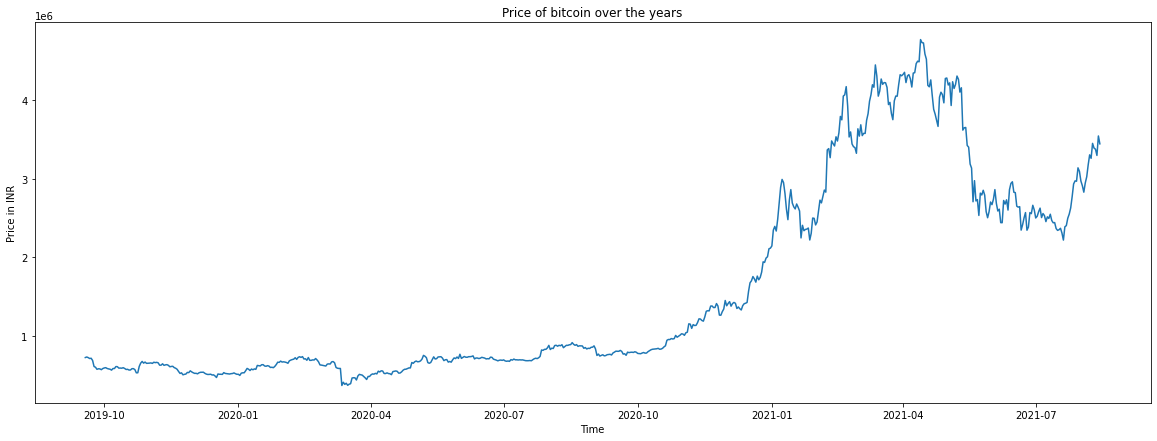

In [16]:
plt.figure(figsize=(20,7))
plt.title("Price of bitcoin over the years")
plt.plot(df['2019-09-18':'2021-08-14'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

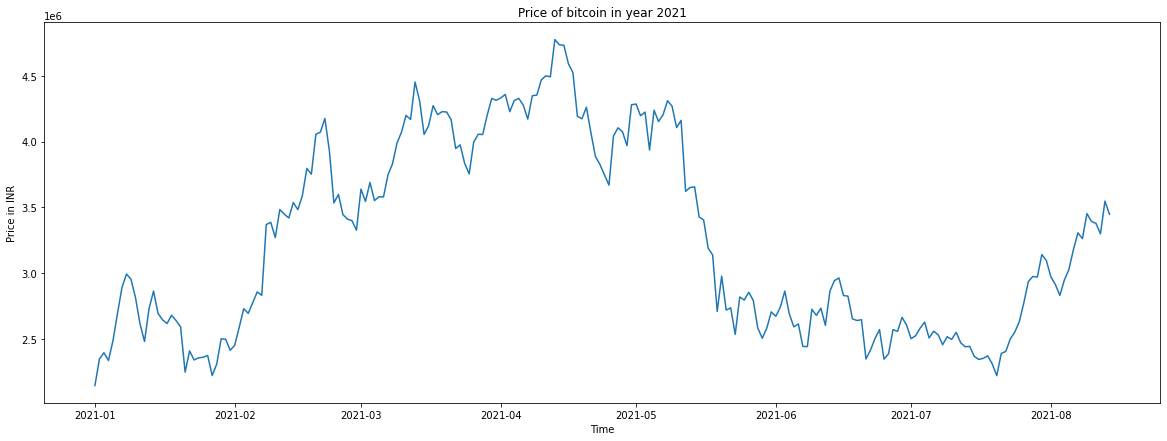

In [17]:
plt.figure(figsize=(20,7))
plt.title("Price of bitcoin in year 2021")
plt.plot(df['2021-01-01':'2021-08-14'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [18]:
data=df.values

In [19]:
data

array([[ 725961.     ],
       [ 732951.1875 ],
       [ 724993.9375 ],
       [ 713463.9375 ],
       [ 717018.5625 ],
       [ 688840.875  ],
       [ 611785.25   ],
       [ 602472.6875 ],
       [ 576215.6875 ],
       [ 583067.125  ],
       [ 581412.25   ],
       [ 571408.5    ],
       [ 585926.1875 ],
       [ 593290.375  ],
       [ 597178.3125 ],
       [ 586688.8125 ],
       [ 581185.625  ],
       [ 577328.     ],
       [ 565767.3125 ],
       [ 586185.4375 ],
       [ 586053.9375 ],
       [ 611323.4375 ],
       [ 609553.5625 ],
       [ 591260.8125 ],
       [ 592312.25   ],
       [ 590159.     ],
       [ 596671.25   ],
       [ 586683.875  ],
       [ 574306.125  ],
       [ 576431.25   ],
       [ 566819.3125 ],
       [ 567910.75   ],
       [ 584096.375  ],
       [ 584640.5625 ],
       [ 572292.25   ],
       [ 531475.1875 ],
       [ 532109.625  ],
       [ 613524.0625 ],
       [ 654913.8125 ],
       [ 676643.4375 ],
       [ 654827.125  ],
       [ 668372.

In [20]:
len(data)

693

In [21]:
import math

In [22]:
train_len=math.ceil(len(data)*0.92)

In [23]:
train_len

638

In [24]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [25]:
scaled_data=min_max_scalar.fit_transform(data)

In [26]:
len(scaled_data)

693

In [27]:
scaled_data

array([[8.08194375e-02],
       [8.24065682e-02],
       [8.05998648e-02],
       [7.79819642e-02],
       [7.87890461e-02],
       [7.23912676e-02],
       [5.48956934e-02],
       [5.27812647e-02],
       [4.68195807e-02],
       [4.83752079e-02],
       [4.79994665e-02],
       [4.57281028e-02],
       [4.90243616e-02],
       [5.06964094e-02],
       [5.15791704e-02],
       [4.91975165e-02],
       [4.79480111e-02],
       [4.70721326e-02],
       [4.44472643e-02],
       [4.90832246e-02],
       [4.90533674e-02],
       [5.47908384e-02],
       [5.43889861e-02],
       [5.02355947e-02],
       [5.04743249e-02],
       [4.99854269e-02],
       [5.14640412e-02],
       [4.91963955e-02],
       [4.63860121e-02],
       [4.68685244e-02],
       [4.46861222e-02],
       [4.49339344e-02],
       [4.86089004e-02],
       [4.87324589e-02],
       [4.59287594e-02],
       [3.66611953e-02],
       [3.68052451e-02],
       [5.52904930e-02],
       [6.46880865e-02],
       [6.96218245e-02],


In [28]:
train_data=scaled_data[0:train_len,:]

In [29]:
len(train_data)

638

In [30]:
interval=60

In [31]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [32]:
x_train

[array([0.08081944, 0.08240657, 0.08059986, 0.07798196, 0.07878905,
        0.07239127, 0.05489569, 0.05278126, 0.04681958, 0.04837521,
        0.04799947, 0.0457281 , 0.04902436, 0.05069641, 0.05157917,
        0.04919752, 0.04794801, 0.04707213, 0.04444726, 0.04908322,
        0.04905337, 0.05479084, 0.05438899, 0.05023559, 0.05047432,
        0.04998543, 0.05146404, 0.0491964 , 0.04638601, 0.04686852,
        0.04468612, 0.04493393, 0.0486089 , 0.04873246, 0.04592876,
        0.0366612 , 0.03680525, 0.05529049, 0.06468809, 0.06962182,
        0.0646684 , 0.0677438 , 0.06406177, 0.0642505 , 0.06466371,
        0.0652977 , 0.06386681, 0.06727549, 0.06611401, 0.0669137 ,
        0.06548699, 0.05868308, 0.05882409, 0.06273211, 0.05830068,
        0.05968445, 0.0602868 , 0.0582787 , 0.05410978, 0.05509571]),
 array([0.08240657, 0.08059986, 0.07798196, 0.07878905, 0.07239127,
        0.05489569, 0.05278126, 0.04681958, 0.04837521, 0.04799947,
        0.0457281 , 0.04902436, 0.05069641, 0.

In [33]:
y_train

[0.055527023573125306,
 0.05172313503989481,
 0.04988162187629486,
 0.04681213053532621,
 0.04049743858544588,
 0.03492768042380928,
 0.03657761201966053,
 0.030876149955925816,
 0.03230790660911921,
 0.03307235261214418,
 0.037811493528919424,
 0.03724365260203047,
 0.042433986878056856,
 0.03931225956428104,
 0.03694034054476883,
 0.03507986860375231,
 0.03525102265646274,
 0.03370351954518688,
 0.0367285585132084,
 0.03816042869201508,
 0.03831002706890532,
 0.0384342524712291,
 0.03524588562246214,
 0.03303972818902991,
 0.03191140421406226,
 0.032045705014564,
 0.032668542005732784,
 0.03034109664522021,
 0.030780015047536233,
 0.027593599420247403,
 0.02309119488390013,
 0.033295643302750144,
 0.03248246643022783,
 0.03252410904424645,
 0.032077619902595306,
 0.037251358153031364,
 0.03493510925612782,
 0.03446525512419496,
 0.03369871599267528,
 0.03318025870756,
 0.03421758480813866,
 0.034670076616591605,
 0.03637441536260386,
 0.034090024590925,
 0.032446131138629694,
 0.0324

In [34]:
import numpy as np

In [35]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [36]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [37]:
x_train.shape

(578, 60, 1)

In [38]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [39]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))

In [40]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [41]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
10/10 [==============================] - 3s 41ms/step - loss: 0.0874
Epoch 2/100
10/10 [==============================] - 0s 35ms/step - loss: 0.0103
Epoch 3/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0040
Epoch 4/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0029
Epoch 5/100
10/10 [==============================] - 0s 33ms/step - loss: 0.0026
Epoch 6/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0025
Epoch 7/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0022
Epoch 8/100
10/10 [==============================] - 0s 33ms/step - loss: 0.0025
Epoch 9/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0022
Epoch 10/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0021
Epoch 11/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0040
Epoch 12/100
10/10 [==============================] - 0s 32ms/step - loss: 0.0036
Epoch 13/100
10/10 [=====

10/10 [==============================] - 0s 34ms/step - loss: 7.1081e-04
Epoch 100/100
10/10 [==============================] - 0s 33ms/step - loss: 6.5188e-04


In [42]:
test_data=scaled_data[train_len-interval:,:]

In [43]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [44]:
y_test

array([[2348365.75],
       [2416225.25],
       [2503838.25],
       [2571625.25],
       [2347012.25],
       [2387702.  ],
       [2571713.5 ],
       [2557977.  ],
       [2664539.75],
       [2606038.  ],
       [2503053.25],
       [2524721.5 ],
       [2582215.75],
       [2628306.  ],
       [2507936.75],
       [2559397.  ],
       [2533128.5 ],
       [2456651.5 ],
       [2517635.75],
       [2496965.25],
       [2550786.  ],
       [2471501.5 ],
       [2441512.5 ],
       [2444258.75],
       [2368921.5 ],
       [2345052.25],
       [2353344.25],
       [2371928.75],
       [2311138.5 ],
       [2221459.25],
       [2390334.5 ],
       [2405822.  ],
       [2500114.5 ],
       [2552849.75],
       [2631791.5 ],
       [2773796.25],
       [2935918.  ],
       [2975305.  ],
       [2970715.25],
       [3141450.5 ],
       [3096127.25],
       [2973306.5 ],
       [2913965.25],
       [2831506.5 ],
       [2948865.25],
       [3027324.25],
       [3178784.75],
       [33065

In [45]:
x_test

[array([0.79852013, 0.78452697, 0.76681215, 0.74901008, 0.83364978,
        0.84783197, 0.84102685, 0.81710036, 0.88754777, 0.88885786,
        0.86871489, 0.8749479 , 0.80941365, 0.87818997, 0.85862741,
        0.87043969, 0.89459839, 0.88501615, 0.84819542, 0.86068523,
        0.73825557, 0.74504917, 0.74590686, 0.69399023, 0.68893068,
        0.64028053, 0.62845263, 0.5311714 , 0.59215747, 0.53358808,
        0.53742797, 0.49159234, 0.5560968 , 0.55079709, 0.56436056,
        0.55031273, 0.50275344, 0.48497613, 0.50243376, 0.53042684,
        0.52282653, 0.53845912, 0.56625814, 0.52674907, 0.50452586,
        0.50966539, 0.47079859, 0.47060344, 0.53485219, 0.52442974,
        0.53676197, 0.50713394, 0.56608416, 0.5842532 , 0.58889282,
        0.55875915, 0.55755192, 0.51844978, 0.51556475, 0.51695272]),
 array([0.78452697, 0.76681215, 0.74901008, 0.83364978, 0.84783197,
        0.84102685, 0.81710036, 0.88754777, 0.88885786, 0.86871489,
        0.8749479 , 0.80941365, 0.87818997, 0.

In [46]:
len(y_test)

55

In [47]:
len(x_test)

55

In [48]:
x_test=np.array(x_test)

In [49]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [50]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

In [51]:
predictions[0:5]

array([[2815571.2],
       [2689347.8],
       [2588581.8],
       [2544139.5],
       [2553668.5]], dtype=float32)

In [52]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

93325.93636363637

In [53]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [54]:
train_data.head()

,Close
Date,
2019-09-18,725961.0000
2019-09-19,732951.1875
2019-09-20,724993.9375
2019-09-21,713463.9375
2019-09-22,717018.5625


In [55]:
valid_data.head()

,Close,predictions
Date,,
2021-06-21,2348365.75,2815571.25
2021-06-22,2416225.25,2689347.75
2021-06-23,2503838.25,2588581.75
2021-06-24,2571625.25,2544139.50
2021-06-25,2347012.25,2553668.50


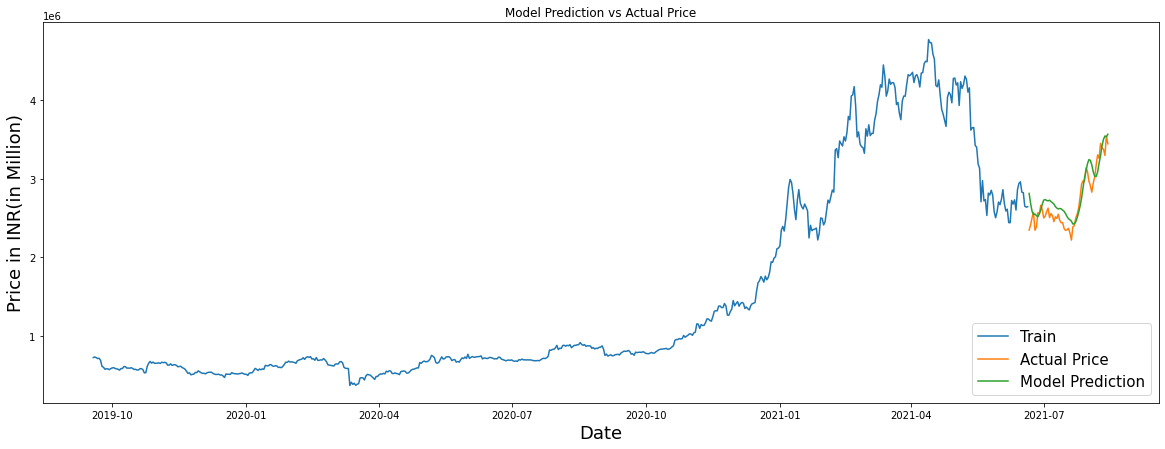

In [56]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

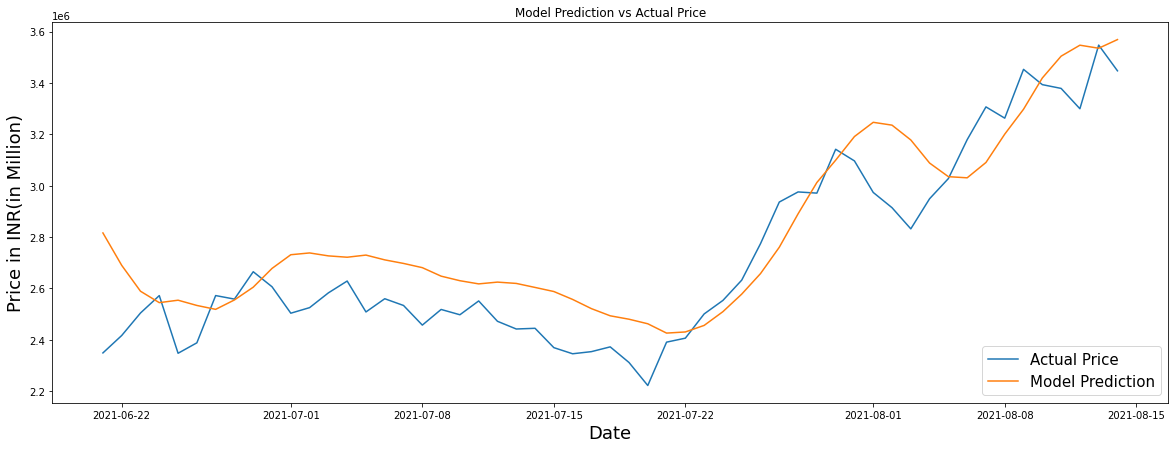

In [57]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [58]:
valid_data.head(30)

,Close,predictions
Date,,
2021-06-21,2348365.75,2815571.25
2021-06-22,2416225.25,2689347.75
2021-06-23,2503838.25,2588581.75
2021-06-24,2571625.25,2544139.50
2021-06-25,2347012.25,2553668.50
2021-06-26,2387702.00,2533224.50
2021-06-27,2571713.50,2518026.00
2021-06-28,2557977.00,2554680.50
2021-06-29,2664539.75,2604360.75


In [66]:
df_test=bitcoin.history(start='2001-01-19', end='2021-05-13', actions=False)

In [69]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-18,734975.875,731490.6875,725478.5,725961.0,1151007367909


In [70]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [71]:
test_value=df_test[-60:].values

In [74]:
test_value

array([[0.8947403 ],
       [0.83648685],
       [0.85126981],
       [0.88601177],
       [0.87065368],
       [0.8756781 ],
       [0.87513522],
       [0.86175163],
       [0.81212862],
       [0.8184562 ],
       [0.78646525],
       [0.76842949],
       [0.82295766],
       [0.83671248],
       [0.83633869],
       [0.86980258],
       [0.89849471],
       [0.89527898],
       [0.8993449 ],
       [0.90534041],
       [0.87567821],
       [0.89491661],
       [0.89860925],
       [0.88686821],
       [0.86282303],
       [0.90314971],
       [0.90425942],
       [0.93052902],
       [0.93751562],
       [0.93578639],
       [1.        ],
       [0.9910518 ],
       [0.99023827],
       [0.95839865],
       [0.94321778],
       [0.8677136 ],
       [0.86337102],
       [0.88342248],
       [0.83921225],
       [0.79852013],
       [0.78452697],
       [0.76681215],
       [0.74901008],
       [0.83364978],
       [0.84783197],
       [0.84102685],
       [0.81710036],
       [0.887

In [73]:
test_value=min_max_scalar.transform(test_value)

In [78]:
test=[]
test.append(test_value)

In [79]:
test

[array([[0.8947403 ],
        [0.83648685],
        [0.85126981],
        [0.88601177],
        [0.87065368],
        [0.8756781 ],
        [0.87513522],
        [0.86175163],
        [0.81212862],
        [0.8184562 ],
        [0.78646525],
        [0.76842949],
        [0.82295766],
        [0.83671248],
        [0.83633869],
        [0.86980258],
        [0.89849471],
        [0.89527898],
        [0.8993449 ],
        [0.90534041],
        [0.87567821],
        [0.89491661],
        [0.89860925],
        [0.88686821],
        [0.86282303],
        [0.90314971],
        [0.90425942],
        [0.93052902],
        [0.93751562],
        [0.93578639],
        [1.        ],
        [0.9910518 ],
        [0.99023827],
        [0.95839865],
        [0.94321778],
        [0.8677136 ],
        [0.86337102],
        [0.88342248],
        [0.83921225],
        [0.79852013],
        [0.78452697],
        [0.76681215],
        [0.74901008],
        [0.83364978],
        [0.84783197],
        [0

In [80]:
test=np.array(test)

In [81]:
test

array([[[0.8947403 ],
        [0.83648685],
        [0.85126981],
        [0.88601177],
        [0.87065368],
        [0.8756781 ],
        [0.87513522],
        [0.86175163],
        [0.81212862],
        [0.8184562 ],
        [0.78646525],
        [0.76842949],
        [0.82295766],
        [0.83671248],
        [0.83633869],
        [0.86980258],
        [0.89849471],
        [0.89527898],
        [0.8993449 ],
        [0.90534041],
        [0.87567821],
        [0.89491661],
        [0.89860925],
        [0.88686821],
        [0.86282303],
        [0.90314971],
        [0.90425942],
        [0.93052902],
        [0.93751562],
        [0.93578639],
        [1.        ],
        [0.9910518 ],
        [0.99023827],
        [0.95839865],
        [0.94321778],
        [0.8677136 ],
        [0.86337102],
        [0.88342248],
        [0.83921225],
        [0.79852013],
        [0.78452697],
        [0.76681215],
        [0.74901008],
        [0.83364978],
        [0.84783197],
        [0

In [82]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [83]:
tomorrow_prediction=model.predict(test)

In [84]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [85]:
tomorrow_prediction

array([[4055938.8]], dtype=float32)

In [59]:
model.save("Bitcoin_price_prediction.h5")